In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDF = pd.read_csv(city_data_to_load)
rideDF = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
DF = pd.merge(cityDF, rideDF, how="outer")
DF.sort_values('city')
# Display the data table for preview
DF.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [16]:
#make DataFrames for each city type
urbanCityDF = cityDF.loc[cityDF["type"] == "Urban", :]
suburbanCityDF = cityDF.loc[cityDF["type"] == "Suburban", :]
ruralCityDF = cityDF.loc[cityDF["type"] == "Rural", :]

#make DataFrames for each ride by city type
urbanRideDF = DF.loc[DF["type"] == "Urban", :]
suburbanRideDF = DF.loc[DF["type"] == "Suburban", :]
ruralRideDF = DF.loc[DF["type"] == "Rural", :]

## Bubble Plot of Ride Sharing Data

In [29]:
    # Obtain the x and y coordinates for each of the three city types

#get total ride count for each city in descending order (x coordinate)
urbanRidesByCity = urbanRideDF["city"].value_counts().tolist()
suburbanRidesByCity = suburbanRideDF["city"].value_counts().tolist()
ruralRidesByCity = ruralRideDF["city"].value_counts().tolist()

#get driver count for each city in descending order (circle size)
urbanDriverCount = urbanCityDF.sort_values(["driver_count"], ascending=False)
urbanDriverCount = urbanDriverCount["driver_count"].tolist()
suburbanDriverCount = suburbanCityDF.sort_values(["driver_count"], ascending=False)
suburbanDriverCount = suburbanDriverCount["driver_count"].tolist()
ruralDriverCount = ruralCityDF.sort_values(["driver_count"], ascending=False)
ruralDriverCount = ruralDriverCount["driver_count"].tolist()

#get average fare for each city in descending order (y coordinate)
urbanAvgFare = []
suburbanAvgFare = []
ruralAvgFare = []

#got stuck here on an indent error
#rest of scatter plot code won't work as a result
#all pie charts work

#populate lists by checking to see if same city name,
#adding fare to running total for city,
#dividing running total by ride count by city
for row in urbanRideDF["city"]:
    if row[1] == row[0]:
#        add fare to running total for city
#        add 1 to ride count for city   
    else:
#        divide running total by ride count, append to urbanAvgFare list for that city
#        reset fare counter variable
#        reset city ride count variable (or use previous ascending list somehow)

IndentationError: expected an indented block (<ipython-input-29-9626fc94656c>, line 29)

In [18]:
    # Build the scatter plots for each city types
plt.scatter(urbanRidesByCity, urbanAvgFare, marker="o", facecolors="red", edgecolors="black",
            s=urbanDriverCount, alpha=0.75, label = "urban")
plt.scatter(suburbanRidesByCity, suburbanAvgFare, marker="o", facecolors="cyan", edgecolors="black",
            s=suburbanDriverCount, alpha=0.75, label = "suburban")
plt.scatter(ruralRidesByCity, ruralAvgFare, marker="o", facecolors="yellow", edgecolors="black",
            s=ruralDriverCount, alpha=0.75, label = "rural")

NameError: name 'urbanRidesByCity' is not defined

Text(0,0.5,'Average Fare ($)')

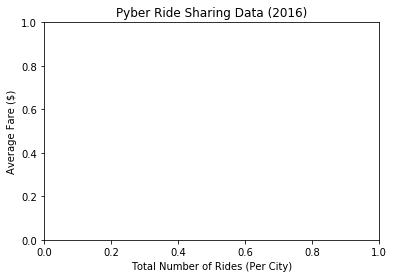

In [19]:
    # Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

No handles with labels found to put in legend.


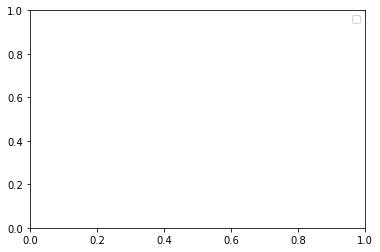

In [20]:
    # Create a legend
plt.legend(loc='upper right')

In [21]:
    # Incorporate a text label regarding circle size
plt.gcf().text(0.02, 0.5, "Note: Circle size correlates with driver count per city.")

Text(0.02,0.5,'Note: Circle size correlates with driver count per city.')

<Figure size 432x288 with 0 Axes>

In [22]:
    # Save Figure
plt.savefig("/Images/pyberRideSharingData.png")

FileNotFoundError: [Errno 2] No such file or directory: '/Images/pyberRideSharingData.png'

<Figure size 432x288 with 0 Axes>

In [23]:
# Show plot
plt.show()

## Total Fares by City Type

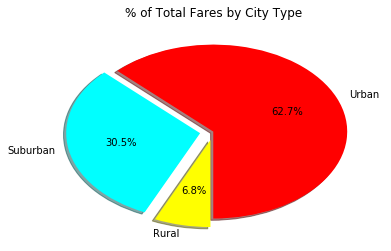

<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate Type Percents
percentTotalFares = []
#fill percents list with sum of each city type's fare/sum of total fare
percentTotalFares.append(round(100*(urbanRideDF["fare"].sum()/DF["fare"].sum()), 1))
percentTotalFares.append(round(100*(suburbanRideDF["fare"].sum()/DF["fare"].sum()), 1))
percentTotalFares.append(round(100*(ruralRideDF["fare"].sum()/DF["fare"].sum()), 1))

# Build Pie Chart
# Create parameter lists (for all following pie charts)
labels = ["Urban", "Suburban", "Rural"]
colors = ["Red", "Cyan", "Yellow"]
explode = (0, 0.1, 0.1)

plt.pie (percentTotalFares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig("Images/totalFaresByCityType.png")

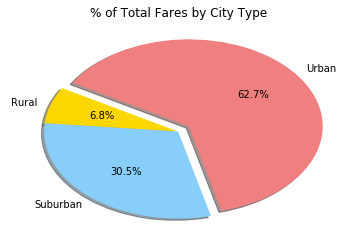

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

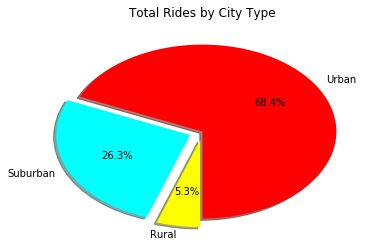

<Figure size 432x288 with 0 Axes>

In [26]:
# Calculate Ride Percents
totalRides = len(DF)
totalRidesByType = DF["type"].value_counts().tolist()
percentRides = []
for x in totalRidesByType:
    percentRides.append(100*(x/totalRides))
# Build Pie Chart
plt.pie (percentRides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig("Images/totalRidesByCityType.png")


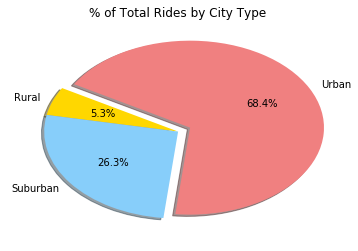

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

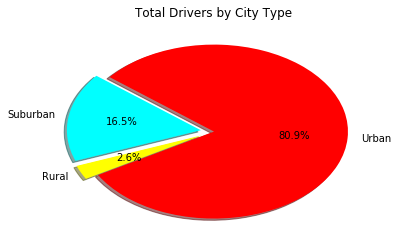

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate Driver Percents
#create and fill list: sum of driver count of each city type
#                     /sum of driver count of all cities
percentDrivers = []
percentDrivers.append(round(100*(urbanCityDF["driver_count"].sum()
                                 /cityDF["driver_count"].sum()), 1))
percentDrivers.append(round(100*(suburbanCityDF["driver_count"].sum()
                                 /cityDF["driver_count"].sum()), 1))
percentDrivers.append(round(100*(ruralCityDF["driver_count"].sum()
                                 /cityDF["driver_count"].sum()), 1))

# Build Pie Charts
plt.pie (percentDrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.title("Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("Images/totalDriversByCityType.png")

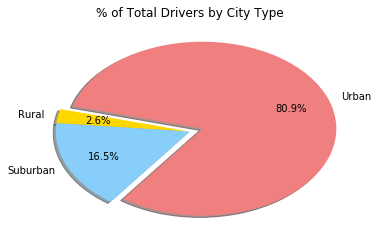

In [6]:
# Show Figure
plt.show()